## Alternatives to New York City? A research of the neighborhoods in Bergen County, New Jersey.

#### 1. Introduction / Business Problem
    New York City is one of the most vibrant city in the world. The culture diversity, the optimizied business environment, the unique landscaping, and the countless restaurants and venues all make it such an attractive place to live in. For the same reasons, Manhattan is also the most expensive place to live in. Since COVID-19 started in March 2020, a lot of New Yorkers started searching for suburban neighborhoods around the area, hoping to find places less densely populated, but still have similar characteristics as the city. Bergen county, New Jersey is located around 25 miles northwest from NYC. Only 40 minutes commute time make it the home town of many people who works in NYC. 
    
    In this project, we try to get a deeper understanding of the neighborhoods in Bergen County. We will analyze each city by the most popular venues. Data science methodologies will be applied to the datasets. We will group the cities in Bergen County based on most popular venues' categories. In the end, we'll compare the clusters with Manhattan, NY's data and answer the question: which city is the best alternative to New York City?

#### 2. Data 
    a. Bergen County has population of 905,116. There're four types of municipalities: Borough, City, Village and Township. (For short, we call all these four types 'city' in these research).  There are 70 cities in Bergen County according to 2010 Census data.
    We collect cities' name from Wikipedia: https://en.wikipedia.org/wiki/Bergen_County,_New_Jersey
    
    b. For each city, we search for the top 100 venues within the city. We use Foursquare API to get the venues' data for each city based on the cities' name. 
    
    c. Venues' data of Manhattan NY is also collected from Foursquare API to be compared with Bergen County data.
    

#### 3. Data Preparation

#### a.  Scrape list of cities of Bergen County from Wikipedia

In [2]:
import pandas as pd
cities = pd.read_html('https://en.wikipedia.org/wiki/Bergen_County,_New_Jersey')
cities= cities[8][:-1]
print (cities)

   Municipality(with map key) Municipaltype  Population  HousingUnits  \
0                   Allendale       borough        6505          2388   
1                      Alpine       borough        1849           670   
2                 Bergenfield       borough       26764          9200   
3                      Bogota       borough        8187          2888   
4                   Carlstadt       borough        6127          2495   
5              Cliffside Park       borough       23594         10665   
6                     Closter       borough        8373          2860   
7                   Cresskill       borough        8573          3114   
8                    Demarest       borough        4881          1659   
9                      Dumont       borough       17479          6542   
10            East Rutherford       borough        8913          4018   
11                  Edgewater       borough       11513          6282   
12               Elmwood Park       borough       1

In [3]:
cities.shape

(70, 10)

In [4]:
cities.head()

,Municipality(with map key),Municipaltype,Population,HousingUnits,TotalArea,WaterArea,LandArea,Pop.Density,HousingDensity,Communities[203]
0,Allendale,borough,6505,2388,3.12,0.02,3.10,2100.7,771.2,NaN
1,Alpine,borough,1849,670,9.23,2.82,6.41,288.4,104.5,NaN
2,Bergenfield,borough,26764,9200,2.89,0.01,2.88,9306.5,3199.1,NaN
3,Bogota,borough,8187,2888,0.81,0.05,0.76,10702.5,3775.4,NaN
4,Carlstadt,borough,6127,2495,4.24,0.24,4.00,1532.1,623.9,NaN


From the above results, we see that there are 70 cities in Bergen County. We also got Municipality(with map key),	Municipaltype,	Population,	HousingUnits,	TotalArea,	WaterArea,	LandArea,	Pop.Density,	HousingDensity,	Communities information from the same table. We only need first column 'Municipality' as the input to request data from Foursquare API in next step.

#### b. Use Foursquare API to explore each neighborhood. Let's start with the first neighborhood 'Allendale'

In [5]:
cities.loc[0, 'Municipality(with map key)']

'Allendale'

In [6]:
CLIENT_ID = 'CIBI5CYIIWHDFQHWD2ZRUQLLZCU5QJW2TECSKJEQ1N2OTDRQD' 
CLIENT_SECRET = 'HW3YN1SL5MZBNZLYF2AC3FQMICSGPZGWHESMMYHMU4UCLEKP' 
VERSION = '20180604'
ACCESS_TOKEN = 'VGMROHHZQMSOV45DDDP0OQUJXUT0BT5UYPZF5A3TIJG1HOTY'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CIBI5CYIIWHDFQHWD2ZRUQLLZCU5QJW2TECSKJEQ1N2OTDRQD
CLIENT_SECRET:HW3YN1SL5MZBNZLYF2AC3FQMICSGPZGWHESMMYHMU4UCLEKP


In [7]:
import numpy as np 
import pandas as pd 
import json 

!pip install geopy
from geopy.geocoders import Nominatim 


import requests 
from pandas.io.json import json_normalize 

import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium
import folium 

print('Libraries imported.')

     |████████████████████████████████| 102kB 8.9MB/s ta 0:00:011
Libraries imported.


In [8]:
# as we search based on city name, the default setting return city-wide data without the radius parameter  
LIMIT = 50
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&near={}&oauth_token={}&v={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, 'Allendale, NJ', ACCESS_TOKEN, VERSION, LIMIT)
url


'https://api.foursquare.com/v2/venues/explore?client_id=CIBI5CYIIWHDFQHWD2ZRUQLLZCU5QJW2TECSKJEQ1N2OTDRQD&client_secret=HW3YN1SL5MZBNZLYF2AC3FQMICSGPZGWHESMMYHMU4UCLEKP&near=Allendale, NJ&oauth_token=VGMROHHZQMSOV45DDDP0OQUJXUT0BT5UYPZF5A3TIJG1HOTY&v=20180604&limit=50'

In [9]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f204b791b8cb275166a7510'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'geocode': {'what': '',
   'where': 'allendale nj',
   'center': {'lat': 41.04149, 'lng': -74.12903},
   'displayString': 'Allendale, NJ, United States',
   'cc': 'US',
   'geometry': {'bounds': {'ne': {'lat': 41.048744, 'lng': -74.114553},
     'sw': {'lat': 41.018464, 'lng': -74.155604}}},
   'slug': 'allendale-new-jersey',
   'longId': '72057594043023060'},
  'headerLocation': 'Allendale',
  'headerFullLocation': 'Allendale',
  'headerLocationGranularity': 'city',
  'totalResults': 66,
  'suggestedBounds': {'ne': {'lat': 41.04386994450702,
    'lng': -74.11493339538575},
   'sw': {'lat': 41.01947381764417, 'lng': -74.1472354888916}},
  'groups': [{'type': 'Recommended Places',
    'nam

In [10]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [11]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Savini,Italian Restaurant,41.037416,-74.132267
1,Masa Sushi & Grill,Sushi Restaurant,41.030544,-74.128819
2,Restaurant L,American Restaurant,41.020583,-74.123136
3,Allendale Celery Farm,Farm,41.034093,-74.127081
4,The Allendale Bar & Grill,American Restaurant,41.030319,-74.128417


In [12]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

50 venues were returned by Foursquare.


#### c. Explore neighborhoods in Bergen County. We also include Manhattan, NY in the dataset.

In [13]:
def getNearbyVenues(names):
    
    venues_list=[]
    for name in names:
        print(name)
            
        # create the API request URL
        if name != 'Manhattan':
            nameState = name + ', NJ'
        else:
            nameState = name + ', NY'
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&oauth_token={}&v={}&near={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                ACCESS_TOKEN,
                VERSION, 
                nameState,
                LIMIT)

            
            
        # make the GET request
        req = requests.get(url).json()
        lat = req['response']['geocode']['center']['lat']
        long = req['response']['geocode']['center']['lng']
        results = req["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, lat, long,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 'Latitude', 'Longitude',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [14]:
LIMIT = 100
bergen_venues = getNearbyVenues(names=list(cities['Municipality(with map key)']) + ['Manhattan'] )


Allendale
Alpine
Bergenfield
Bogota
Carlstadt
Cliffside Park
Closter
Cresskill
Demarest
Dumont
East Rutherford
Edgewater
Elmwood Park
Emerson
Englewood
Englewood Cliffs
Fair Lawn
Fairview
Fort Lee
Franklin Lakes
Garfield
Glen Rock
Hackensack
Harrington Park
Hasbrouck Heights
Haworth
Hillsdale
Ho-Ho-Kus
Leonia
Little Ferry
Lodi
Lyndhurst
Mahwah
Maywood
Midland Park
Montvale
Moonachie
New Milford
North Arlington
Northvale
Norwood
Oakland
Old Tappan
Oradell
Palisades Park
Paramus
Park Ridge
Ramsey
Ridgefield
Ridgefield Park
Ridgewood
River Edge
River Vale
Rochelle Park
Rockleigh
Rutherford
Saddle Brook
Saddle River
South Hackensack
Teaneck
Tenafly
Teterboro
Upper Saddle River
Waldwick
Wallington
Washington Township
Westwood
Woodcliff Lake
Wood-Ridge
Wyckoff
Manhattan


In [15]:
print(bergen_venues.shape)
bergen_venues.head()

(5736, 7)


,Neighborhood,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Allendale,41.04149,-74.12903,Savini,41.037416,-74.132267,Italian Restaurant
1,Allendale,41.04149,-74.12903,Masa Sushi & Grill,41.030544,-74.128819,Sushi Restaurant
2,Allendale,41.04149,-74.12903,Restaurant L,41.020583,-74.123136,American Restaurant
3,Allendale,41.04149,-74.12903,Allendale Celery Farm,41.034093,-74.127081,Farm
4,Allendale,41.04149,-74.12903,The Allendale Bar & Grill,41.030319,-74.128417,American Restaurant


In [16]:
bergen_venues[['Neighborhood', 'Venue']].groupby('Neighborhood').count()

,Venue
Neighborhood,
Allendale,66
Alpine,32
Bergenfield,92
Bogota,86
Carlstadt,79
Cliffside Park,100
Closter,100
Cresskill,70
Demarest,15


In [17]:
print('There are {} uniques categories.'.format(len(bergen_venues['Venue Category'].unique())))

There are 376 uniques categories.


#### d. Find most common venue catelories for each neighborhood

In [18]:
# one hot encoding
bergen_onehot = pd.get_dummies(bergen_venues[['Venue Category']], prefix="", prefix_sep="")
cols = list(bergen_onehot.columns)
cols.remove('Neighborhood')

# add neighborhood column back to dataframe
bergen_onehot['Neighborhood'] = bergen_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = ['Neighborhood'] + cols
bergen_onehot = bergen_onehot[fixed_columns]

bergen_onehot.head()

,Neighborhood,ATM,Accessories Store,Advertising Agency,Airport,Airport Service,Airport Terminal,Alternative Healer,American Restaurant,Antique Shop,...,Watch Shop,Waterfront,Weight Loss Center,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Allendale,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Allendale,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Allendale,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Allendale,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Allendale,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
bergen_grouped = bergen_onehot.groupby('Neighborhood').mean().reset_index()
bergen_grouped

,Neighborhood,ATM,Accessories Store,Advertising Agency,Airport,Airport Service,Airport Terminal,Alternative Healer,American Restaurant,Antique Shop,...,Watch Shop,Waterfront,Weight Loss Center,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Allendale,0.000000,0.000000,0.000000,0.000000,0.000000,0.015152,0.000000,0.030303,0.000000,...,0.000000,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.015152,0.000000,0.00
1,Alpine,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250,0.000000,...,0.000000,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00
2,Bergenfield,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.00,0.010870,0.00,0.010870,0.000000,0.000000,0.00
3,Bogota,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.011628,0.000000,0.00
4,Carlstadt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012658,0.000000,...,0.000000,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00
5,Cliffside Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00
6,Closter,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00
7,Cresskill,0.014286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014286,0.000000,...,0.000000,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.014286,0.028571,0.00
8,Demarest,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00
9,Dumont,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023810,0.000000,...,0.000000,0.0,0.000000,0.00,0.000000,0.00,0.011905,0.000000,0.000000,0.00


Print Top Five Categories for each city:

In [20]:

num_top_venues = 5

for hood in bergen_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = bergen_grouped[bergen_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allendale----
                venue  freq
0                Food  0.06
1        Home Service  0.05
2  Italian Restaurant  0.05
3    Business Service  0.05
4        Dance Studio  0.03


----Alpine----
                     venue  freq
0                    Trail  0.19
1           Scenic Lookout  0.12
2       Athletics & Sports  0.06
3  State / Provincial Park  0.06
4               Campground  0.06


----Bergenfield----
                  venue  freq
0           Pizza Place  0.08
1              Pharmacy  0.07
2      Asian Restaurant  0.05
3          Home Service  0.04
4  Fast Food Restaurant  0.03


----Bogota----
                venue  freq
0         Pizza Place  0.09
1                Food  0.08
2                 Bar  0.05
3  Italian Restaurant  0.05
4        Liquor Store  0.05


----Carlstadt----
                        venue  freq
0          Italian Restaurant  0.05
1  Construction & Landscaping  0.05
2                        Food  0.05
3                 Pizza Place  0.04
4           

### 4.  Modeling

We transform the dataset above to a dataframe containing the most popular categories for each city. Then we use K-Means Clustering to cluster the neighborhoods.

In [33]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bergen_grouped['Neighborhood']

for ind in np.arange(bergen_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bergen_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allendale,Food,Italian Restaurant,Home Service,Business Service,Martial Arts Dojo,Pharmacy,Dance Studio,Baseball Field,Bank,American Restaurant
1,Alpine,Trail,Scenic Lookout,Athletics & Sports,State / Provincial Park,Sushi Restaurant,Campground,Mexican Restaurant,Flea Market,Business Service,Food Truck
2,Bergenfield,Pizza Place,Pharmacy,Asian Restaurant,Home Service,Fast Food Restaurant,Food,Mobile Phone Shop,Video Store,Convenience Store,Construction & Landscaping
3,Bogota,Pizza Place,Food,Grocery Store,Italian Restaurant,Bar,Liquor Store,Deli / Bodega,Baseball Field,Pharmacy,Park
4,Carlstadt,Food,Italian Restaurant,Construction & Landscaping,Sandwich Place,Bus Stop,Convenience Store,Pizza Place,Paper / Office Supplies Store,Bagel Shop,Bakery


#### Cluster the neighborhoods

Firstly, we use elbow method to run k-means clustering on the dataset for a range of values for k

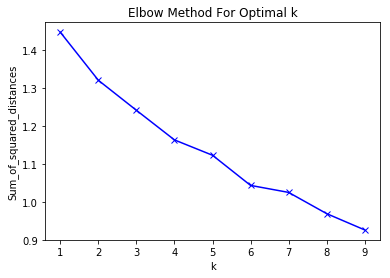

In [30]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

bergen_grouped_clustering = bergen_grouped.drop('Neighborhood', 1)


# Use the quick method and immediately show the figure
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(bergen_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

We can see that k = 6 indicating the optimal k for these dataset. Now we use k = 5 and get the clusters.

In [34]:
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bergen_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([2, 4, 1, 3, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 2, 1, 3, 0, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 1, 1, 3, 2, 5, 1, 1, 5, 2, 1, 1, 1, 5, 1, 3,
       2, 1, 3, 5, 1], dtype=int32)

In [35]:
# add clustering labels

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

bergen_merged = bergen_venues[['Neighborhood', 'Latitude', 'Longitude']].groupby('Neighborhood').mean().reset_index()


bergen_merged = bergen_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

bergen_merged.head() # check the last columns!



,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allendale,41.04149,-74.12903,2,Food,Italian Restaurant,Home Service,Business Service,Martial Arts Dojo,Pharmacy,Dance Studio,Baseball Field,Bank,American Restaurant
1,Alpine,40.95593,-73.93125,4,Trail,Scenic Lookout,Athletics & Sports,State / Provincial Park,Sushi Restaurant,Campground,Mexican Restaurant,Flea Market,Business Service,Food Truck
2,Bergenfield,40.92760,-73.99736,1,Pizza Place,Pharmacy,Asian Restaurant,Home Service,Fast Food Restaurant,Food,Mobile Phone Shop,Video Store,Convenience Store,Construction & Landscaping
3,Bogota,40.87621,-74.02986,3,Pizza Place,Food,Grocery Store,Italian Restaurant,Bar,Liquor Store,Deli / Bodega,Baseball Field,Pharmacy,Park
4,Carlstadt,40.84038,-74.09070,1,Food,Italian Restaurant,Construction & Landscaping,Sandwich Place,Bus Stop,Convenience Store,Pizza Place,Paper / Office Supplies Store,Bagel Shop,Bakery


Visualize the result clusters using folium

In [36]:
# Bergen County latitude and longitude
latitude = 40.9263
longitude = -74.0770

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bergen_merged['Latitude'], bergen_merged['Longitude'], bergen_merged['Neighborhood'], bergen_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Examing each cluster:

Cluster 0

In [37]:
bergen_merged.loc[bergen_merged['Cluster Labels'] == 0, bergen_merged.columns[[0] + list(range(4, bergen_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Fort Lee,Korean Restaurant,Italian Restaurant,Sushi Restaurant,Asian Restaurant,Bakery,Pizza Place,Bubble Tea Shop,Park,Coffee Shop,Japanese Restaurant
45,Palisades Park,Korean Restaurant,Café,Bakery,Mobile Phone Shop,Chinese Restaurant,Fried Chicken Joint,Noodle House,Spa,Pizza Place,Bubble Tea Shop
49,Ridgefield,Korean Restaurant,Construction & Landscaping,Cosmetics Shop,Bakery,Italian Restaurant,Pizza Place,Sandwich Place,Flower Shop,Other Repair Shop,Coffee Shop


Cluster 1

In [38]:
bergen_merged.loc[bergen_merged['Cluster Labels'] == 1, bergen_merged.columns[[0] + list(range(4, bergen_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Bergenfield,Pizza Place,Pharmacy,Asian Restaurant,Home Service,Fast Food Restaurant,Food,Mobile Phone Shop,Video Store,Convenience Store,Construction & Landscaping
4,Carlstadt,Food,Italian Restaurant,Construction & Landscaping,Sandwich Place,Bus Stop,Convenience Store,Pizza Place,Paper / Office Supplies Store,Bagel Shop,Bakery
5,Cliffside Park,Turkish Restaurant,Food,Spa,Pizza Place,Italian Restaurant,Bakery,Café,Convenience Store,Deli / Bodega,Thai Restaurant
6,Closter,Food,Coffee Shop,Korean Restaurant,Construction & Landscaping,Spa,Pizza Place,Bank,Insurance Office,Mexican Restaurant,Sushi Restaurant
9,Dumont,Pizza Place,Food,Home Service,Chinese Restaurant,Bagel Shop,Mobile Phone Shop,Sushi Restaurant,Park,Bar,Italian Restaurant
10,East Rutherford,Football Stadium,Bar,Donut Shop,Hotel,Gym,Italian Restaurant,Mexican Restaurant,Pizza Place,Sandwich Place,Spa
11,Edgewater,Japanese Restaurant,Coffee Shop,Italian Restaurant,Burger Joint,Mexican Restaurant,Cosmetics Shop,Dessert Shop,Spa,Steakhouse,Furniture / Home Store
12,Elmwood Park,Pizza Place,Construction & Landscaping,Convenience Store,Bank,Donut Shop,Discount Store,Ice Cream Shop,Pharmacy,Italian Restaurant,Fast Food Restaurant
13,Emerson,Construction & Landscaping,Train Station,Ice Cream Shop,Mobile Phone Shop,Sandwich Place,Bank,Bakery,Golf Course,Liquor Store,Other Repair Shop
14,Englewood,Pizza Place,Bank,Mexican Restaurant,Donut Shop,Middle Eastern Restaurant,Japanese Restaurant,Italian Restaurant,Ice Cream Shop,Convenience Store,Gym


Cluster 2

In [39]:
bergen_merged.loc[bergen_merged['Cluster Labels'] == 2, bergen_merged.columns[[0] + list(range(4, bergen_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allendale,Food,Italian Restaurant,Home Service,Business Service,Martial Arts Dojo,Pharmacy,Dance Studio,Baseball Field,Bank,American Restaurant
7,Cresskill,Food,Spa,Pizza Place,Yoga Studio,Baseball Field,Bank,Grocery Store,Athletics & Sports,Chinese Restaurant,Electronics Store
15,Englewood Cliffs,Business Service,Trail,Health & Beauty Service,Harbor / Marina,Italian Restaurant,Gym,Lawyer,Insurance Office,Food,Diner
23,Harrington Park,Food,Bus Station,Construction & Landscaping,Insurance Office,Restaurant,Business Service,Soccer Field,Other Great Outdoors,Basketball Court,Locksmith
27,Ho-Ho-Kus,Food,Pharmacy,Home Service,Yoga Studio,Park,Business Service,American Restaurant,Gym / Fitness Center,Martial Arts Dojo,Bakery
28,Leonia,Park,Bus Stop,Café,Korean Restaurant,Food,Deli / Bodega,Home Service,Shipping Store,Chinese Restaurant,Construction & Landscaping
41,Norwood,Pizza Place,Business Service,Construction & Landscaping,Home Service,Food,Fast Food Restaurant,Martial Arts Dojo,Chinese Restaurant,Bank,Cosmetics Shop
43,Old Tappan,Food,Business Service,Italian Restaurant,Optical Shop,Park,Mobile Phone Shop,Grocery Store,Home Service,Pharmacy,Print Shop
44,Oradell,Food,Insurance Office,Pharmacy,Business Service,Spa,Gym,Lawyer,Martial Arts Dojo,Doctor's Office,Pizza Place
50,Ridgefield Park,Food,Park,Construction & Landscaping,Business Service,Italian Restaurant,Home Service,Intersection,Spanish Restaurant,Deli / Bodega,Convenience Store


Cluster 3

In [40]:
bergen_merged.loc[bergen_merged['Cluster Labels'] == 3, bergen_merged.columns[[0] + list(range(4, bergen_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Bogota,Pizza Place,Food,Grocery Store,Italian Restaurant,Bar,Liquor Store,Deli / Bodega,Baseball Field,Pharmacy,Park
8,Demarest,Food,Construction & Landscaping,Pizza Place,Soccer Field,Baseball Field,Golf Course,Liquor Store,Park,Train Station,Donut Shop
17,Fairview,Food,Deli / Bodega,Italian Restaurant,Pizza Place,Bakery,Home Service,Fast Food Restaurant,Korean Restaurant,Latin American Restaurant,Lawyer
37,Moonachie,Food,Business Service,Italian Restaurant,Airport Terminal,Rental Car Location,Deli / Bodega,Shipping Store,Construction & Landscaping,Paper / Office Supplies Store,Carpet Store
53,River Vale,Pizza Place,Bagel Shop,Food,Italian Restaurant,Golf Course,Print Shop,Ice Cream Shop,Deli / Bodega,Donut Shop,Restaurant
65,Wallington,Home Service,Food,Pizza Place,Deli / Bodega,Construction & Landscaping,Liquor Store,Mexican Restaurant,Donut Shop,Baseball Field,Bus Stop
68,Wood-Ridge,Pizza Place,Food,Italian Restaurant,Fast Food Restaurant,Home Service,Electronics Store,Intersection,Restaurant,Business Service,Ice Cream Shop


Cluster 4

In [41]:
bergen_merged.loc[bergen_merged['Cluster Labels'] == 4, bergen_merged.columns[[0] + list(range(4, bergen_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Alpine,Trail,Scenic Lookout,Athletics & Sports,State / Provincial Park,Sushi Restaurant,Campground,Mexican Restaurant,Flea Market,Business Service,Food Truck


Cluster 5

In [42]:
bergen_merged.loc[bergen_merged['Cluster Labels'] == 5, bergen_merged.columns[[0] + list(range(4, bergen_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
55,Rockleigh,Event Space,Optical Shop,College Cafeteria,Massage Studio,Clothing Store,Business Service,Construction & Landscaping,American Restaurant,Cosmetics Shop,Hotel
58,Saddle River,Business Service,Yoga Studio,Construction & Landscaping,Italian Restaurant,Park,French Restaurant,Pet Store,Restaurant,Lawyer,Café
63,Upper Saddle River,Construction & Landscaping,Home Service,Business Service,Food,Furniture / Home Store,Athletics & Sports,Lawyer,Liquor Store,Climbing Gym,Theater
69,Woodcliff Lake,Food,Women's Store,Clothing Store,Business Service,Construction & Landscaping,Furniture / Home Store,Boutique,Home Service,Rental Car Location,Spa


### 5. Results 
As we can see, Manhattan is in Cluster 1. Next we will test each city in Cluster 1 and calculate the euclidean distance between the city and Manhattan.


In [43]:
cluster1 = bergen_merged.loc[bergen_merged['Cluster Labels'] == 1, bergen_merged.columns[[0] + list(range(4, bergen_merged.shape[1]))]]
s = set(cluster1['Neighborhood'])
manhattan = bergen_grouped.loc[bergen_grouped['Neighborhood'] == 'Manhattan'].to_numpy()[0][1:]
candidate = []
for index, row in bergen_grouped.iterrows():
    if row['Neighborhood']  in s and row['Neighborhood'] != 'Manhattan':        
        eu_dist = np.linalg.norm(row.to_numpy()[1:] - manhattan)
        candidate.append([row['Neighborhood'], eu_dist])
candidate.sort(key = lambda x: x[1])
for i in range(10):
    print (i + 1, candidate[i])

1 ['Hillsdale', 0.20893212194142705]
2 ['Tenafly', 0.2121320343559643]
3 ['Glen Rock', 0.21912662559434445]
4 ['Westwood', 0.22759613353482086]
5 ['Little Ferry', 0.23334223624569486]
6 ['Ridgewood', 0.23366642891095854]
7 ['Hackensack', 0.2366431913239847]
8 ['Teaneck', 0.2379075450674064]
9 ['Wyckoff', 0.23790754506740644]
10 ['Lyndhurst', 0.23790754506740647]


Now we get the top ten cities: Hillsdale, Tenafly, Glen Rock, Westwood, Little Ferry, Ridgewood, Hackensack, Teaneck, Lyndhurst, and Wyckoff.

### 6. Discussion

In the above test, we only include cities in Cluster 1, which is the cluster where Manhattan is grouped in. However, we want to know if they're still the top 10 cities if we include all cities in Bergen County? In other words, are they gloabal optimized results? 

Next, we will use the same Euclidean Distance to calculate all cities in Bergen County and get the top 10.

In [44]:
s = set(bergen_grouped['Neighborhood'])
manhattan = bergen_grouped.loc[bergen_grouped['Neighborhood'] == 'Manhattan'].to_numpy()[0][1:]
candidate = []
for index, row in bergen_grouped.iterrows():
    if row['Neighborhood'] != 'Manhattan':        
        eu_dist = np.linalg.norm(row.to_numpy()[1:] - manhattan)
        candidate.append([row['Neighborhood'], eu_dist])
candidate.sort(key = lambda x: x[1])
for i in range(10):
    print (i + 1, candidate[i])

1 ['Hillsdale', 0.20893212194142705]
2 ['Tenafly', 0.2121320343559643]
3 ['Glen Rock', 0.21912662559434445]
4 ['Ridgefield Park', 0.2191904296369813]
5 ['Leonia', 0.22114728677734125]
6 ['Westwood', 0.22759613353482086]
7 ['Little Ferry', 0.23334223624569486]
8 ['Ridgewood', 0.23366642891095854]
9 ['Hackensack', 0.2366431913239847]
10 ['Teaneck', 0.2379075450674064]


Now we get the top ten cities: Hillsdale, Tenafly, Glen Rock, Ridgefield Park, Leionia, Westwood, Little Ferry, Ridgewood, Hackensack, Teaneck.

As we can see, 8 out of the 10 cities are still in Cluster 1. But we also got Ridgefield Park and Leionia from other clusters with lower Euclidean Distance from Manhattan. This is becuase when we fit the k- means model, these two cities are far from the centroid of cluster 1, so that they're not clusterred in it. However, the distance between them and manhattan is low. So we should include them in the result.


This leads us to another question: Are the cities within Bergen County more alike to each other? Or are they more similar to Manhattan?

We test 5 cities within Cluster 1 except Manhattan, namely the distance between: Hillsdale and Tenafly, Tenafly and Glen Rock, Glen Rock and Ridgefield Park, Ridgefield Park and Leonia

In [37]:

manhattan = bergen_grouped.loc[bergen_grouped['Neighborhood'] == 'Manhattan'].to_numpy()[0][1:]
hillsdale = bergen_grouped.loc[bergen_grouped['Neighborhood'] == 'Hillsdale'].to_numpy()[0][1:]
tenafly = bergen_grouped.loc[bergen_grouped['Neighborhood'] == 'Tenafly'].to_numpy()[0][1:]
glenrock = bergen_grouped.loc[bergen_grouped['Neighborhood'] == 'Glen Rock'].to_numpy()[0][1:]
ridgefieldpark = bergen_grouped.loc[bergen_grouped['Neighborhood'] == 'Ridgefield Park'].to_numpy()[0][1:]
leonia = bergen_grouped.loc[bergen_grouped['Neighborhood'] == 'Leonia'].to_numpy()[0][1:]

In [38]:
L5 = [hillsdale, tenafly, glenrock, ridgefieldpark, leonia]
for i in range(1, 5):
    eu_dist = np.linalg.norm(L5[i] - L5[i - 1])
    print (eu_dist)
    

0.14458652481436404
0.13630179812468923
0.14203660678189045
0.1555270463023048


As we can see from the above results, the euclidean distance of Bergen County cities within same cluster is about 25% lower than the distance between the same city and Manhattan. 

This result coincide with our intuition: Geometrically closer cities are usually more similar to each other. 

### 7. Conclusion

Just as no two leaves are alike, no two cities are the same. Each city has it's own characteristics which makes it unique and attracts people who love it. New York City is such a good example. There's no place like NYC. However, if you look for suburban neighborhoods with easy access to NYC and similar characteristics as NYC, there're certainly a couple of great candidates.

In this research, we discussed Bergen County in New Jersey mainly because it's easy access to NYC and it is much less densely populated compared to some other places in New Jersey such as Hudson County etc. And this is one of the main consideration for New Yorkers during the pandemic.

We applied data science methodologies to collect, clean, tranform data from multiple sources. We also used Foursqaure API to get venues data of each city. We implemented K-Means Clustering and found the top 10 cities most similar to New York City. This successfully answered the question we had at the beginning: Which city is the best alternative to NYC?







